In [ ]:
#PANDAS

Simple salary prediction project  using pandas.

In [2]:
pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5566 sha256=5709e2a211b407ff650fa9d5ffd42eadc0677192a996877a3e5b137f25d2d1a4
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from word2number import w2n

In [4]:
d=pd.read_csv("salary.csv")
d

,experience,test_score,interview_score,salary
0,NaN,8.0,9,90000
1,NaN,8.0,6,50000
2,ten,6.0,7,80000
3,two,10.0,10,30000
4,seven,9.0,6,70000
5,three,7.0,10,45000
6,eight,NaN,7,72000
7,eleven,7.0,8,80000
8,one,8.0,6,20000
9,five,8.0,9,65000


In [5]:
d.experience = d.experience.fillna('zero')
d

,experience,test_score,interview_score,salary
0,zero,8.0,9,90000
1,zero,8.0,6,50000
2,ten,6.0,7,80000
3,two,10.0,10,30000
4,seven,9.0,6,70000
5,three,7.0,10,45000
6,eight,NaN,7,72000
7,eleven,7.0,8,80000
8,one,8.0,6,20000
9,five,8.0,9,65000


In [6]:
d.experience = d.experience.apply(w2n.word_to_num)
d

,experience,test_score,interview_score,salary
0,0,8.0,9,90000
1,0,8.0,6,50000
2,10,6.0,7,80000
3,2,10.0,10,30000
4,7,9.0,6,70000
5,3,7.0,10,45000
6,8,NaN,7,72000
7,11,7.0,8,80000
8,1,8.0,6,20000
9,5,8.0,9,65000


In [7]:
d.test_score = d.test_score.fillna(d.test_score.median())
d

,experience,test_score,interview_score,salary
0,0,8.0,9,90000
1,0,8.0,6,50000
2,10,6.0,7,80000
3,2,10.0,10,30000
4,7,9.0,6,70000
5,3,7.0,10,45000
6,8,8.0,7,72000
7,11,7.0,8,80000
8,1,8.0,6,20000
9,5,8.0,9,65000


In [8]:
d.test_score.median()

8.0

In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       10 non-null     int64  
 1   test_score       10 non-null     float64
 2   interview_score  10 non-null     int64  
 3   salary           10 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 448.0 bytes


In [10]:
d.test_score = d.test_score.astype(int)
d

,experience,test_score,interview_score,salary
0,0,8,9,90000
1,0,8,6,50000
2,10,6,7,80000
3,2,10,10,30000
4,7,9,6,70000
5,3,7,10,45000
6,8,8,7,72000
7,11,7,8,80000
8,1,8,6,20000
9,5,8,9,65000


In [11]:
d.describe()

,experience,test_score,interview_score,salary
count,10.000000,10.000000,10.000000,10.000000
mean,4.700000,7.900000,7.800000,60200.000000
std,4.110961,1.100505,1.619328,23078.609625
min,0.000000,6.000000,6.000000,20000.000000
25%,1.250000,7.250000,6.250000,46250.000000
50%,4.000000,8.000000,7.500000,67500.000000
75%,7.750000,8.000000,9.000000,78000.000000
max,11.000000,10.000000,10.000000,90000.000000


<BarContainer object of 10 artists>

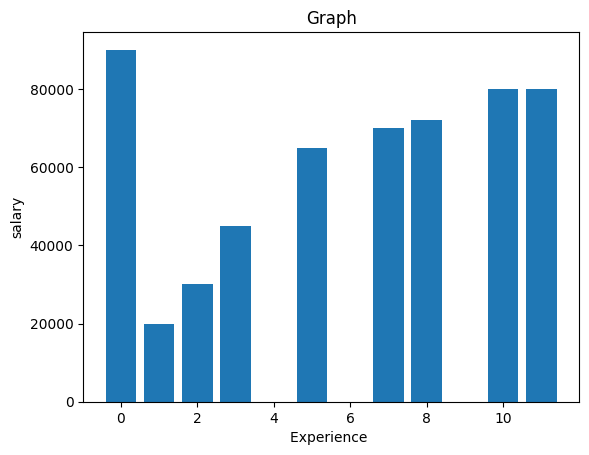

In [12]:
%matplotlib inline
plt.title('Graph')
plt.xlabel('Experience ')
plt.ylabel('salary')
plt.bar(d.experience, d.salary)

<BarContainer object of 10 artists>

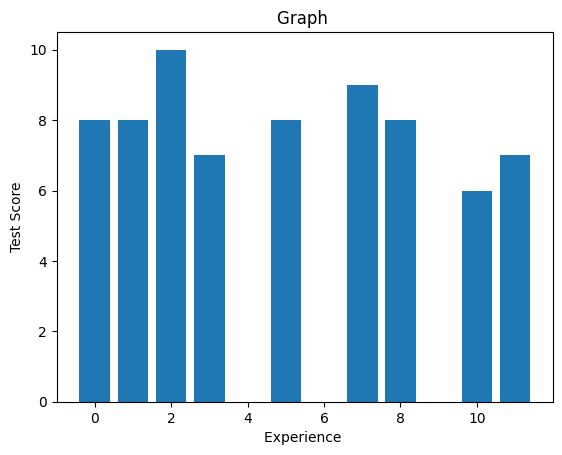

In [13]:
%matplotlib inline
plt.title('Graph ')
plt.xlabel('Experience ')
plt.ylabel('Test Score')
plt.bar(d.experience, d.test_score	)

In [14]:

from sklearn import linear_model


In [15]:
model = linear_model.LinearRegression()

In [16]:
input_data = d.drop(columns='salary')
output_data = d.salary
input_data

,experience,test_score,interview_score
0,0,8,9
1,0,8,6
2,10,6,7
3,2,10,10
4,7,9,6
5,3,7,10
6,8,8,7
7,11,7,8
8,1,8,6
9,5,8,9


In [17]:
output_data

0    90000
1    50000
2    80000
3    30000
4    70000
5    45000
6    72000
7    80000
8    20000
9    65000
Name: salary, dtype: int64

In [18]:
model.fit(input_data,output_data)

LinearRegression()

In [19]:
model.predict([[2,8,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50981.6785746])

In [20]:
model.predict([[2,3,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([78691.88580238])